# Description
In this notebook we read the results and metrics. After that we create box plots and finally fit a function to predict quality class from those metrics.

# Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import random
import os
import matplotlib.pyplot as plt
from damnedlib.utils.figures import save_fig

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

import damnedlib.utils.jupyter_settings

# Settings

In [2]:
save_png = False
save_pdf = False
prefix = ""
img_dir = f"../figures/"
data_dir = f"../data/"

if not os.path.exists(img_dir):
    os.makedirs(img_dir)

if not os.path.exists(img_dir):
    os.makedirs(img_dir)

# Calculations

In [3]:
num_snr_desired = 7
num_signals = 5
order = [f"{i+1:02d}_{j}" for i in range(num_snr_desired) for j in range(num_signals)]
order_unshuffeled = order.copy()
random.seed(42)
random.shuffle(order)

## Read Responses

In [4]:
responses = pd.read_csv(data_dir + "responses.csv", encoding="utf-16")

In [5]:
responses = responses.loc[responses["Status"] == "Response finalized"]
responses

,Response ID,Status,About This Survey,Quality Class 1,Quality Class 2,Quality Class 3,Quality Class 4,Quality Class 5,Quality Class 6,Quality Class 7,...,Quality Class 11,Quality Class 26,Quality Class 34,Quality Class 17,Quality Class 21,Quality Class 8,Quality Class 12,Quality Class 27,Quality Class 35,Quality Class 18
0,38102,Response finalized,I agree to the use of my answers in publicatio...,Class 3: A sensor system of quality class thre...,Class 2: A sensor system of quality class two ...,Class 3: A sensor system of quality class thre...,Class 2: A sensor system of quality class two ...,Class 1: A sensor system of quality class one ...,Class 2: A sensor system of quality class two ...,Class 1: A sensor system of quality class one ...,...,Class 3: A sensor system of quality class thre...,Class 1: A sensor system of quality class one ...,Class 4: A sensor system of quality class four...,Class 1: A sensor system of quality class one ...,1: A sensor system of quality class one can be...,Class 2: A sensor system of quality class two ...,Class 3: A sensor system of quality class thre...,Class 2: A sensor system of quality class two ...,Class 3: A sensor system of quality class thre...,Class 4: A sensor system of quality class four...
1,37947,Response finalized,I agree to the use of my answers in publicatio...,Class 3: A sensor system of quality class thre...,Class 2: A sensor system of quality class two ...,Class 4: A sensor system of quality class four...,Class 2: A sensor system of quality class two ...,Class 1: A sensor system of quality class one ...,Class 2: A sensor system of quality class two ...,Class 2: A sensor system of quality class two ...,...,Class 3: A sensor system of quality class thre...,Class 1: A sensor system of quality class one ...,Class 4: A sensor system of quality class four...,Class 1: A sensor system of quality class one ...,1: A sensor system of quality class one can be...,Class 2: A sensor system of quality class two ...,Class 3: A sensor system of quality class thre...,Class 2: A sensor system of quality class two ...,Class 3: A sensor system of quality class thre...,Class 4: A sensor system of quality class four...
2,37924,Response finalized,I agree to the use of my answers in publicatio...,Class 4: A sensor system of quality class four...,Class 3: A sensor system of quality class thre...,Class 4: A sensor system of quality class four...,Class 2: A sensor system of quality class two ...,Class 1: A sensor system of quality class one ...,Class 2: A sensor system of quality class two ...,Class 3: A sensor system of quality class thre...,...,Class 4: A sensor system of quality class four...,Class 2: A sensor system of quality class two ...,Class 4: A sensor system of quality class four...,Class 1: A sensor system of quality class one ...,1: A sensor system of quality class one can be...,Class 4: A sensor system of quality class four...,Class 4: A sensor system of quality class four...,Class 3: A sensor system of quality class thre...,Class 4: A sensor system of quality class four...,Class 4: A sensor system of quality class four...
3,37681,Response finalized,I agree to the use of my answers in publicatio...,Class 3: A sensor system of quality class thre...,Class 3: A sensor system of quality class thre...,Class 4: A sensor system of quality class four...,Class 2: A sensor system of quality class two ...,Class 1: A sensor system of quality class one ...,Class 2: A sensor system of quality class two ...,Class 1: A sensor system of quality class one ...,...,Class 3: A sensor system of quality class thre...,Class 2: A sensor system of quality class two ...,Class 4: A sensor system of quality class four...,Class 1: A sensor system of quality class one ...,1: A sensor system of quality class one can be...,Class 2: A sensor system of quality class two ...,Class 3: A sensor system of quality class thre...,Class 2: A sensor system of quality class two ...,Class 3: A sensor system of quality class thre...,Cla

In [6]:
def resp_to_num(resp):
    for i in range(1, 5):
        if str(i) in resp:
            return i

In [7]:
columns = order_unshuffeled
classes = pd.DataFrame(columns=columns)

In [8]:
for id in responses["Response ID"]:
    entry = dict()
    for sig in order_unshuffeled:
        num = order.index(sig) + 1
        entry[sig] = resp_to_num(responses.loc[responses["Response ID"] == id][f"Quality Class {num}"].values[0])
    classes = classes.append(entry, ignore_index=True)

In [9]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(classes)

  01_0 01_1 01_2 01_3 01_4 02_0 02_1 02_2 02_3 02_4 03_0 03_1 03_2 03_3 03_4  \
0    4    4    4    4    4    3    4    3    3    3    3    3    2    3    3   
1    4    4    4    4    4    4    4    3    3    3    3    3    2    3    3   
2    4    4    4    4    4    4    4    4    4    4    4    4    3    4    4   
3    4    4    4    4    4    4    3    3    3    3    3    3    3    3    3   

  04_0 04_1 04_2 04_3 04_4 05_0 05_1 05_2 05_3 05_4 06_0 06_1 06_2 06_3 06_4  \
0    3    2    2    3    3    2    2    2    2    2    1    1    1    1    1   
1    3    2    2    2    3    2    2    2    2    2    2    1    1    1    2   
2    4    4    4    4    4    2    3    2    3    4    1    3    2    2    3   
3    3    2    3    3    3    2    2    2    2    2    1    1    1    2    1   

  07_0 07_1 07_2 07_3 07_4  
0    1    1    1    1    1  
1    1    1    1    1    1  
2    1    1    1    1    1  
3    1    1    1    1    1  


## Read Metrics

In [10]:
snr_df = pd.read_csv(data_dir + "snr.csv")
asc_df = pd.read_csv(data_dir + "asc.csv")

## Compile Dataframe

In [11]:
df = pd.DataFrame(columns=["Class", "SNR", "ASC"])

In [12]:
for row in classes.iterrows():
    for signal in classes.columns:
        q_class = row[1][signal]
        snr = snr_df[signal].values[0]
        asc = asc_df[signal].values[0]
        df = df.append({"Class": q_class, "SNR": snr, "ASC": asc, "SNR_db": 10*np.log10(snr)}, ignore_index=True)

## Count Entries

In [13]:
df[df["Class"] == 1].count()

Class     33
SNR       33
ASC       33
SNR_db    33
dtype: int64

In [14]:
df[df["Class"] == 2].count()

Class     30
SNR       30
ASC       30
SNR_db    30
dtype: int64

In [15]:
df[df["Class"] == 3].count()

Class     38
SNR       38
ASC       38
SNR_db    38
dtype: int64

In [16]:
df[df["Class"] == 4].count()

Class     39
SNR       39
ASC       39
SNR_db    39
dtype: int64

# Plots

### ASC

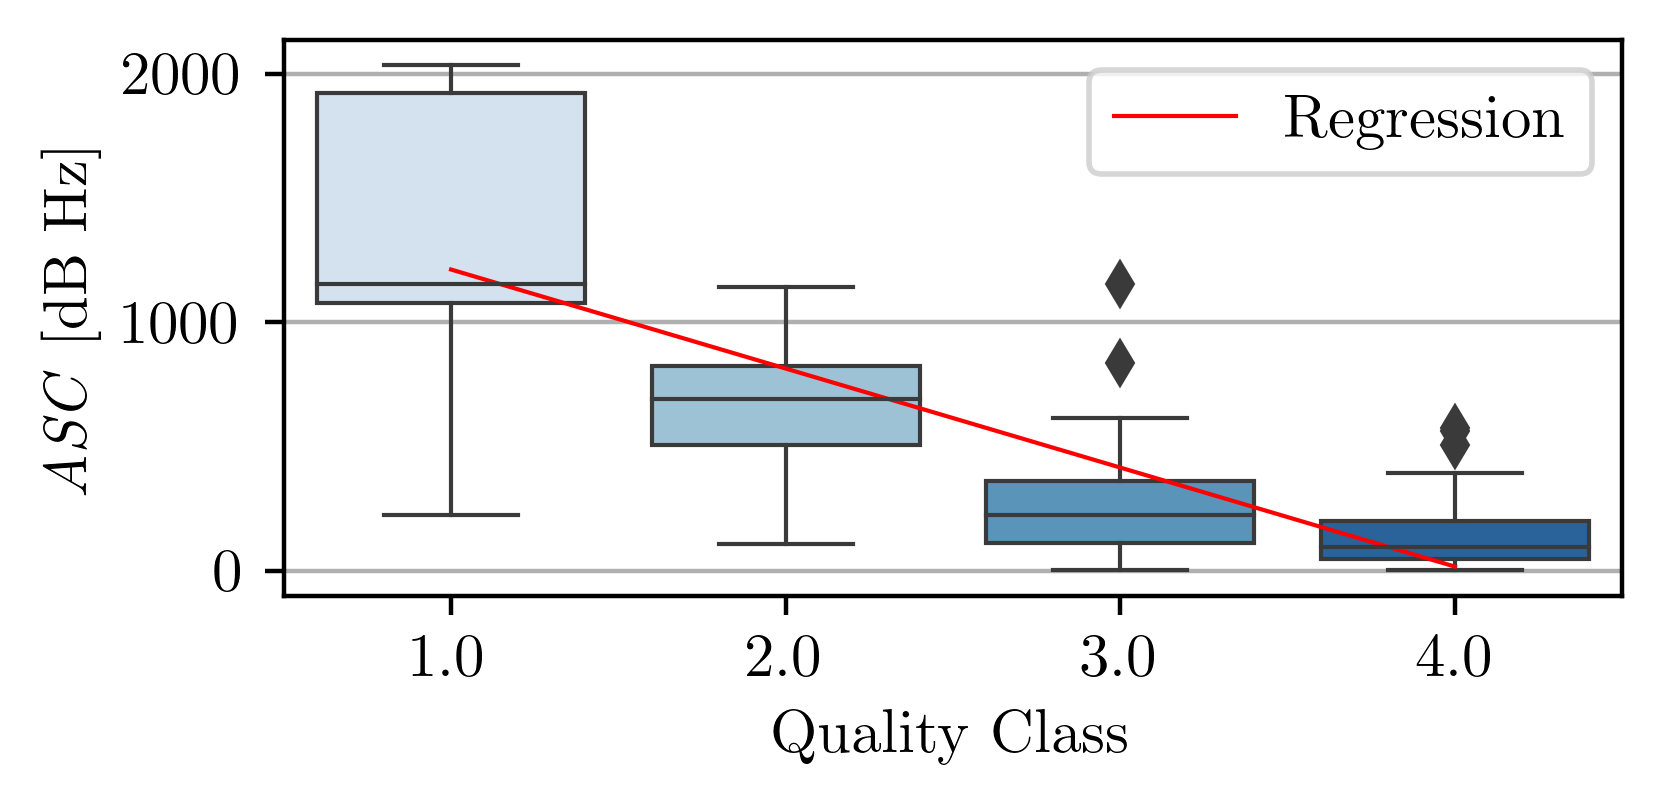

In [17]:
div=1.4
plt.rc("figure", figsize=(6/div, 3/div), max_open_warning=0, dpi=400, autolayout=True)
plt.rc("lines", linewidth=0.75)
plt.rc("font", size=11)

y = df["ASC"].values.reshape(-1,1)
x = df["Class"].values.reshape(-1,1)
lin = LinearRegression()
poly = PolynomialFeatures(degree=1)
x_poly = poly.fit_transform(x)
lin.fit(x_poly, y)

x_con = np.linspace(1, 4, 50)
x_con_poly = poly.transform(x_con.reshape(-1,1))

ax = sns.boxplot(x="Class", y="ASC", palette="Blues", data=df)
ax.plot(x_con - 1, lin.predict(x_con_poly), label="Regression", color="red")
ax.legend()
ax.set_ylabel("$\mathit{ASC}$ [$\mathrm{dB}~\mathrm{Hz}$]")
ax.set_xlabel("Quality Class")

fig = plt.gcf()

save_fig(fig, img_dir + "asc", save_png=save_png, save_pdf=save_pdf)

In [18]:
print(f"ASC for class 1: {lin.predict(poly.transform(np.array(1).reshape(-1,1)))}")
print(f"ASC for class 4: {lin.predict(poly.transform(np.array(4).reshape(-1,1)))}")
print(f"R^2 score: {lin.score(x_poly, y)}")

ASC for class 1: [[1212.64592924]]
ASC for class 4: [[16.74108667]]
R^2 score: 0.5929463117548877


### SNR (dB)

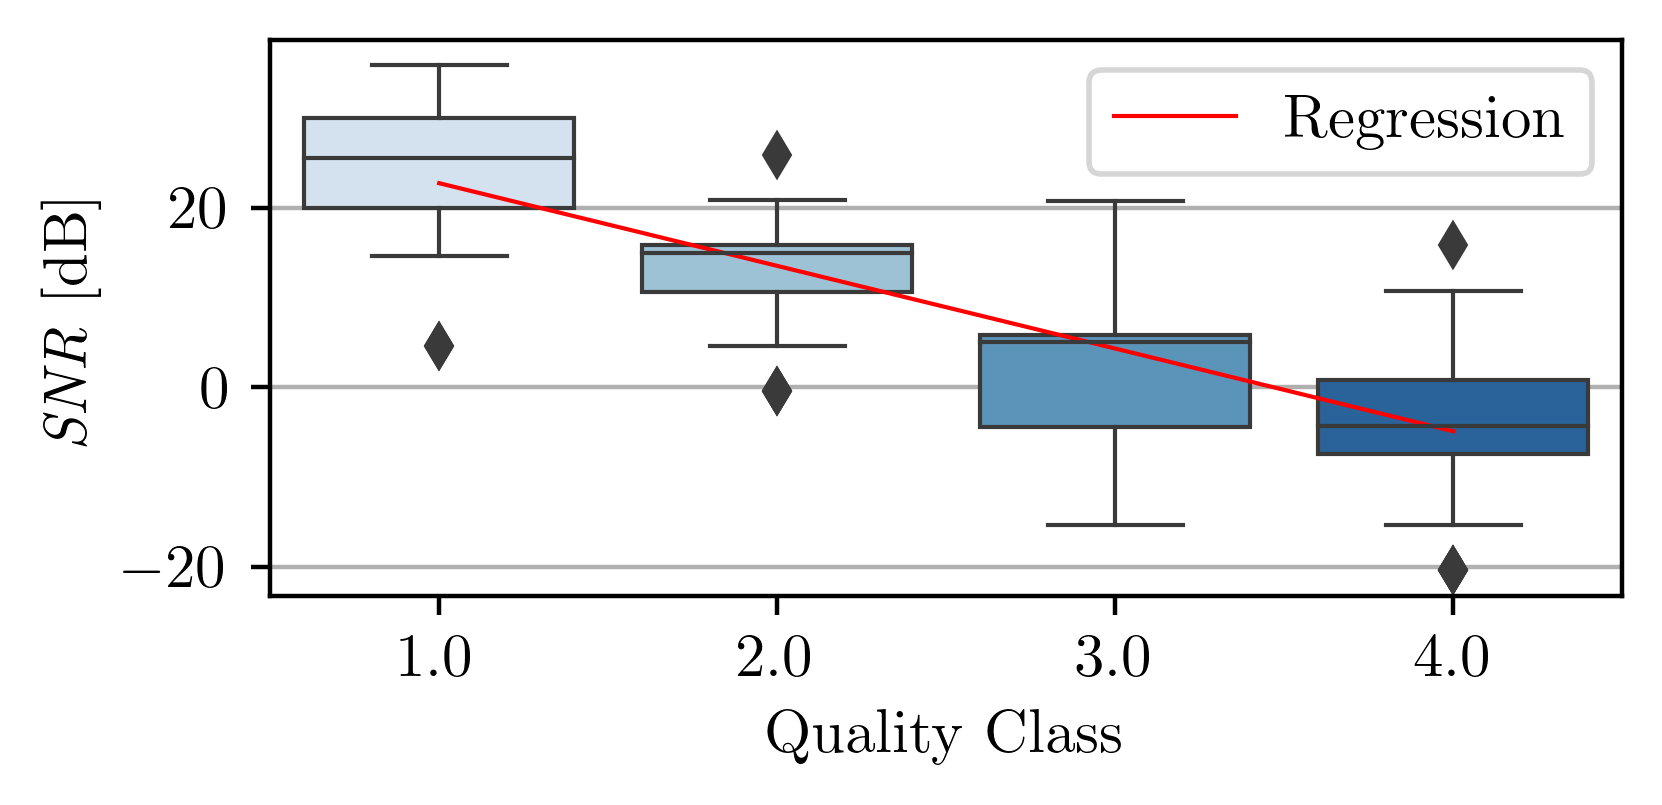

In [19]:
y = df["SNR_db"].values.reshape(-1,1)
x = df["Class"].values.reshape(-1,1)
lin = LinearRegression()
poly = PolynomialFeatures(degree=1)
x_poly = poly.fit_transform(x)
lin.fit(x_poly, y)

x_con = np.linspace(1,4, 50)
x_con_poly = poly.transform(x_con.reshape(-1,1))

ax = sns.boxplot(x="Class", y="SNR_db", palette="Blues", data=df)
ax.plot(x_con - 1, lin.predict(x_con_poly), label="Regression", color="red")
ax.legend()
ax.set_ylabel("$\mathit{SNR}$ [$\mathrm{dB}$]")
ax.set_xlabel("Quality Class")

fig = plt.gcf()

save_fig(fig, img_dir + "snr", save_png=save_png, save_pdf=save_pdf)

In [20]:
print(f"SNR (dB) for class 1: {lin.predict(poly.transform(np.array(1).reshape(-1,1)))}")
print(f"SNR (dB) for class 4: {lin.predict(poly.transform(np.array(4).reshape(-1,1)))}")
print(f"R^2 score: {lin.score(x_poly, y)}")

SNR (dB) for class 1: [[22.71699639]]
SNR (dB) for class 4: [[-4.88550908]]
R^2 score: 0.6122605613441097
